In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
import numpy as np
from keras.layers import Dense, Input, concatenate
from keras.models import Model
import matplotlib.pyplot as plt

In [5]:
def showMetrics (model, data1, labels1, threshold = False):
    prediction = model.predict (data1)
    if (threshold):
        preds = []
        for i in prediction:
            preds.append (i [0] >= 0.5)
        prediction = preds
    print ('Accuracy: ', accuracy_score (labels1, prediction))
    print ('Precision: ', precision_score (labels1, prediction))
    print ('Recall: ', recall_score (labels1, prediction))
    ConfusionMatrixDisplay.from_predictions (labels1, prediction)

In [22]:
data = pd.read_csv ('features1-TF-IDF.csv')
data.head (1)

,E/I,N/S,F/T,P/J,youtubevideo,withtimestamp,mobilelink,giflink,imglink,url,...,fraction,multidigit,listitem,numhyphennum,singledigit,mentionsmb,type,mbti,wordCount,TF-IDF
0,True,False,False,True,16,0,0,1,6,1,...,0,3,3,0,1,0,6,0,702,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [24]:
type1 = 'P/J'
if data.__contains__ ('Unnamed: 0'):
    data = data.drop (columns = ['Unnamed: 0'])
types = ['E/I', 'N/S', 'F/T', 'P/J']
types.remove (type1)

data = data.drop (columns = types)
max_size = data [type1].value_counts ().max ()
lst = [data]
for class_index, group in data.groupby (type1):
    lst.append (group.sample (max_size - len (group), replace = True))
data = pd.concat (lst)

labels = data [type1]
data = data.drop (columns = [type1])

In [26]:
data.head (1)

,youtubevideo,withtimestamp,mobilelink,giflink,imglink,url,ellipsis,\?\.\.,!\.\.,\?!,...,fraction,multidigit,listitem,numhyphennum,singledigit,mentionsmb,type,mbti,wordCount,TF-IDF
0,16,0,0,1,6,1,15,0,0,0,...,0,3,3,0,1,0,6,0,702,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [8]:
trainData, testData, trainLabels, testLabels = train_test_split (data, labels, train_size = 0.8, random_state = 1)
valData, testData, valLabels, testLabels = train_test_split (testData, testLabels, train_size = 0.5)

In [9]:
def listOfStringsToFloatArray (data1):
    lst = data1 ['TF-IDF'].tolist ()
    dataNum = []
    for i in lst:
        i = i.replace ('[', '')
        i = i.replace (']', '')
        vec = []
        lstStr = i.split (', ')
        for j in lstStr:
            vec.append (float (j))
        dataNum.append (vec)
    data1 = data1.drop (columns = ['TF-IDF'])
    return data1, pd.DataFrame (dataNum)

In [10]:
trainData, trainDataText = listOfStringsToFloatArray (trainData)
valData, valDataText = listOfStringsToFloatArray (valData)
testData, testDataText = listOfStringsToFloatArray (testData)

In [34]:
trainDataText.head (1)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
savetraindata, savetraindatatext, savetrainlabels = trainData, trainDataText, trainLabels
savevaldata, savevaldatatext, savevallabels = valData, valDataText, valLabels
savetestdata, savetestdatatext, savetestlabels = testData, testDataText, testLabels
#trainData, trainDataText, trainLabels = savetraindata, savetraindatatext, savetrainlabels
#valData, valDataText, valLabels = savevaldata, savevaldatatext, savevallabels
#testData, testDataText, testLabels = savetestdata, savetestdatatext, savetestlabels

In [12]:
inputLayer1 = Input (shape = (10000, ))
inputLayer2 = Input (shape = (63, ))

l11 = Dense (1000, activation = 'tanh') (inputLayer1)
l12 = Dense (100, activation = 'tanh') (l11)
l13 = Dense (10, activation = 'tanh') (l12)

l21 = Dense (50, activation = 'tanh') (inputLayer2)
l22 = Dense (20, activation = 'tanh') (l21)
l23 = Dense (10, activation = 'tanh') (l22)

merge = concatenate ([l13, l23])

l3 = Dense (10, activation = 'tanh') (merge)
output = Dense (1, activation = 'sigmoid') (l3)

In [13]:
model = Model (inputs = [inputLayer1, inputLayer2], outputs = output)
model.compile (optimizer = "adam", loss = 'mse', metrics = ['accuracy'])

In [20]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10000)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 63)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 1000)         10001000    ['input_1[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 50)           3200        ['input_2[0][0]']                
                                                                                              

In [17]:
h = model.fit ([trainDataText, trainData], trainLabels, validation_data = ([valDataText, valData], valLabels), batch_size = 10, epochs = 100, verbose = True, shuffle = True)

Epoch 1/100
839/839 [==============================] - 34s 41ms/step - loss: 0.0622 - accuracy: 0.9162 - val_loss: 0.2440 - val_accuracy: 0.6985
Epoch 2/100
839/839 [==============================] - 34s 41ms/step - loss: 0.0589 - accuracy: 0.9208 - val_loss: 0.2482 - val_accuracy: 0.6918
Epoch 3/100
839/839 [==============================] - 34s 41ms/step - loss: 0.0564 - accuracy: 0.9233 - val_loss: 0.2546 - val_accuracy: 0.7052
Epoch 4/100
839/839 [==============================] - 36s 43ms/step - loss: 0.0509 - accuracy: 0.9301 - val_loss: 0.2592 - val_accuracy: 0.6994
Epoch 5/100
839/839 [==============================] - 36s 43ms/step - loss: 0.0511 - accuracy: 0.9315 - val_loss: 0.2652 - val_accuracy: 0.6908
Epoch 6/100
839/839 [==============================] - 35s 42ms/step - loss: 0.0483 - accuracy: 0.9332 - val_loss: 0.3165 - val_accuracy: 0.6365
Epoch 7/100
839/839 [==============================] - 35s 41ms/step - loss: 0.0504 - accuracy: 0.9314 - val_loss: 0.2545 - val_ac

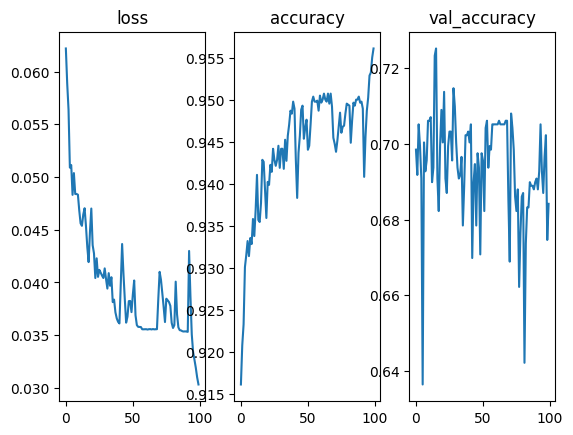

In [18]:
figure, (ax1, ax2, ax3) = plt.subplots(1, 3)

histx = np.arange(0, len(h.history['loss']), 1)
ax1.plot(histx, h.history['loss'])
ax1.set_title("loss")

histx = np.arange(0, len(h.history['accuracy']), 1)
ax2.plot(histx, h.history['accuracy'])
ax2.set_title("accuracy")

histx = np.arange(0, len(h.history['val_accuracy']), 1)
ax3.plot(histx, h.history['val_accuracy'])
ax3.set_title("val_accuracy")

plt.show ()

33/33 [==============================] - 0s 8ms/step
Accuracy:  0.6777883698760725
Precision:  0.6370967741935484
Recall:  0.7775590551181102


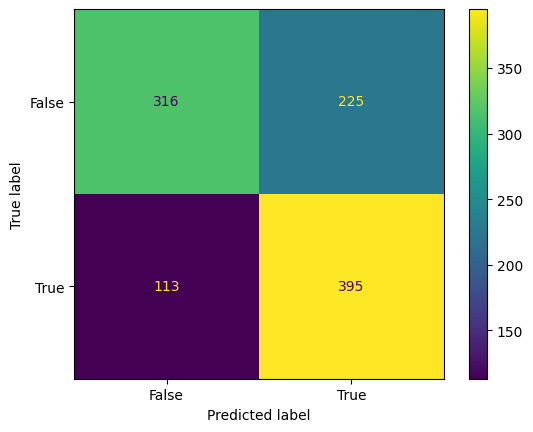

In [19]:
showMetrics (model, [testDataText, testData], testLabels, threshold = True)